In [1]:
import os
import sys

pkg_path = os.path.abspath('..')
sys.path.insert(0, pkg_path)

from pyolin.dataframe import GateData
from pyolin.analysis import similarity_heatmap
from pyolin.analysis import score_heatmap
from pyolin.analysis import compatibility_heatmap
from pyolin.analysis import filter_valid
from pyolin.analysis import score_table
from pyolin.analysis import similarity_table
from pyolin.analysis import compatibility_table
from pyolin.analysis import all_paths

from pyolin.gate import Gate

import matplotlib.pyplot as plt

import pandas
raw = pandas.read_csv('../cyto2func/standardised_cheeky.csv')
renamed = raw.rename(columns={'rrpu': 'decomp_flor'}).rename(columns={'newstandard': 'rrpu'})
data = GateData(renamed)

In [2]:
from pyolin.prediction import prediction
from pyolin.prediction import boundary_curves

filter_valid(data['CC118Lpir':])

/home/mulciber/my/src/python/pyolin/pyolin/gate.py:76: RuntimeWarning: invalid value encountered in double_scalars
  return (k**n * (ymax - t * ymin) / (t * ymin - ymin))**(1 / n)
/home/mulciber/my/src/python/pyolin/pyolin/gate.py:63: RuntimeWarning: invalid value encountered in double_scalars
  return ((k**n * ymax * (t - 1)) / (ymax - t * ymin))**(1 / n)


[CC118Lpir_pSeva221_Amer_f1,
 CC118Lpir_pSeva221_Amtr_a1,
 CC118Lpir_pSeva221_Beti_e1,
 CC118Lpir_pSeva221_Bm3r1_b2,
 CC118Lpir_pSeva221_Phif_p2,
 CC118Lpir_pSeva221_Phif_p3,
 CC118Lpir_pSeva221_Psra_r1,
 CC118Lpir_pSeva221_Qacr_q1,
 CC118Lpir_pSeva221_Qacr_q2,
 CC118Lpir_pSeva231_Amer_f1,
 CC118Lpir_pSeva231_Amtr_a1,
 CC118Lpir_pSeva231_Beti_e1,
 CC118Lpir_pSeva231_Lcara_i1,
 CC118Lpir_pSeva231_Litr_l1,
 CC118Lpir_pSeva231_Lmra_n1,
 CC118Lpir_pSeva231_Phif_p1,
 CC118Lpir_pSeva231_Phif_p2,
 CC118Lpir_pSeva231_Phif_p3,
 CC118Lpir_pSeva231_Psra_r1,
 CC118Lpir_pSeva231_Qacr_q1,
 CC118Lpir_pSeva231_Qacr_q2,
 CC118Lpir_pSeva231_Srpr_s2,
 CC118Lpir_pSeva231_Srpr_s3]

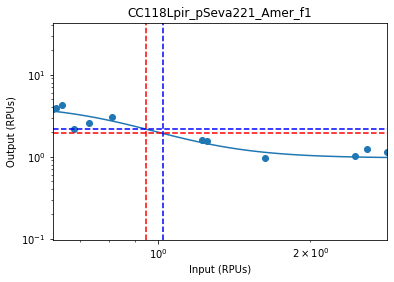

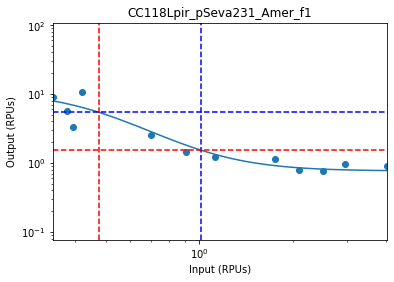

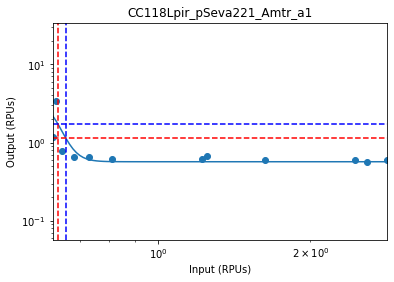

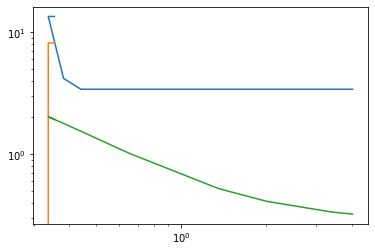

In [3]:
gatea = data['CC118Lpir':'pSeva221':'Amer_f1']
gateb = data['CC118Lpir':'pSeva231':'Amer_f1']
ref = data['CC118Lpir':'pSeva221':'Amtr_a1']

gatea.rpuplot()
gateb.rpuplot()
ref.rpuplot()

unknown = data['CC118Lpir':'pSeva231':'Amtr_a1']

ub, lb = prediction(gatea, gateb, ref)
fig, axes = plt.subplots()
axes.loglog([x for (x, y) in ub], [y for (x, y) in ub])
axes.loglog([x for (x, y) in lb], [y for (x, y) in lb])
axes.loglog([x for (x, y) in ub], [unknown.hill_function(x) for (x, y) in ub])
plt.show();

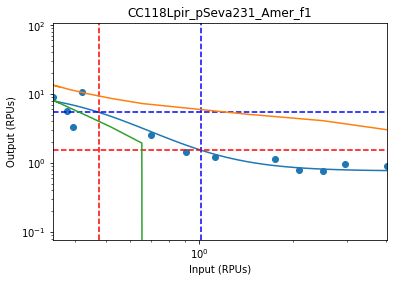

<Figure size 432x288 with 0 Axes>

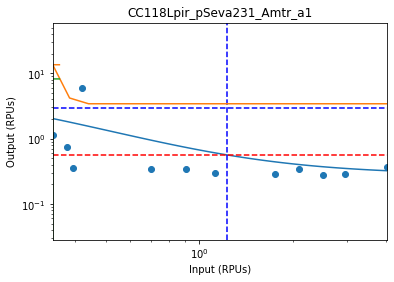

<Figure size 432x288 with 0 Axes>

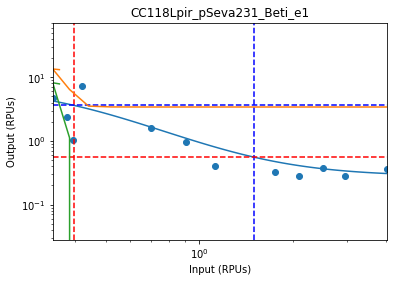

<Figure size 432x288 with 0 Axes>

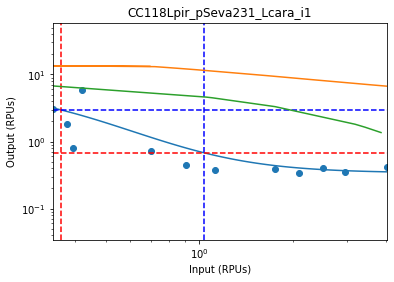

<Figure size 432x288 with 0 Axes>

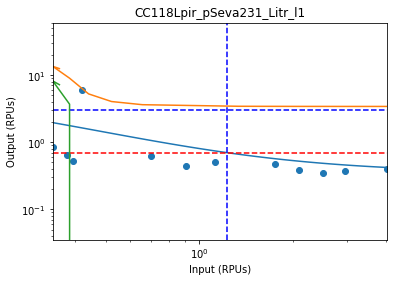

<Figure size 432x288 with 0 Axes>

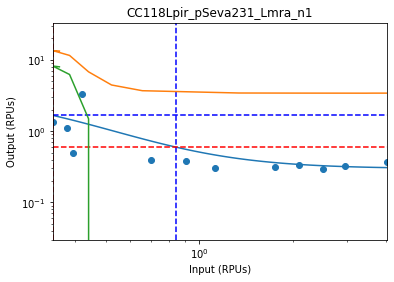

<Figure size 432x288 with 0 Axes>

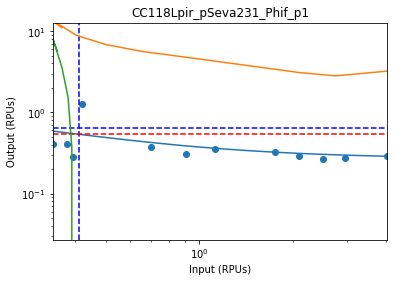

<Figure size 432x288 with 0 Axes>

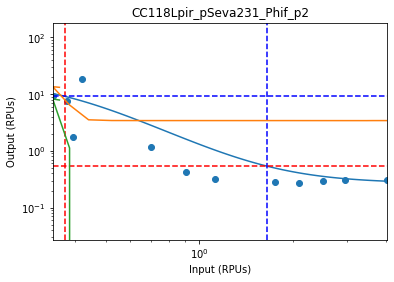

<Figure size 432x288 with 0 Axes>

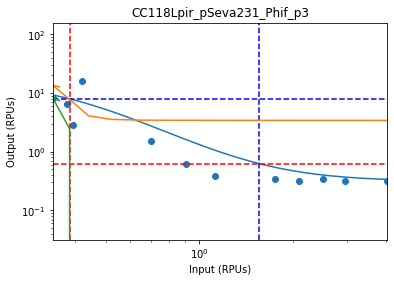

<Figure size 432x288 with 0 Axes>

In [4]:
from pyolin.prediction import do_prediction

do_prediction(gatea, gateb, filter_valid(data['CC118Lpir':'pSeva221':]), filter_valid(data['CC118Lpir':'pSeva231':]))